In [1]:
%load_ext autoreload
%autoreload 2
import sys

# instead of creating a package using setup.py or building from a docker/singularity file,
# import the sister directory of src code to be called on in notebook.
# This keeps the notebook free from code to only hold visualizations and is easier to test
# It also helps keep the state of variables clean such that cells aren't run out of order with a mysterious state
sys.path.append("..")

In [2]:
from src import most_recent_mesonet_data
from src import most_recent_mesonet_time
from src import landtype_describe
from src.plotting_scripts import landtype
import os
import pandas as pd
import cartopy.crs as crs
import cartopy.feature as cfeature

In [3]:
# This will return the most recent data avail on mesonet
# this is my file path
ny_mesonet_data_path = "/home/aevans/nysm/archive/nysm/netcdf/proc"
ok_mesonet_data_path = "/home/aevans/landtype/geoinfo.csv"

In [4]:
# create a dataframe of mesonet data ny
ny_df = most_recent_mesonet_data.current_time_mesonet_df(ny_mesonet_data_path)
ny_df = most_recent_mesonet_time.most_recent_time(ny_df, ny_mesonet_data_path)

In [5]:
ny_df_lons = ny_df["lon"].to_list()
ny_df_lats = ny_df["lat"].to_list()

In [6]:
# # create a dataframe of mesonet data ok
# ok_df = pd.read_csv(ok_mesonet_data_path)

In [7]:
# ok_df_lons = ok_df["elon"].to_list()
# ok_df_lats = ok_df["nlat"].to_list()

develop way to add modes

In [8]:
csv_path = "/home/aevans/nwp_bias/src/landtype/data/buffer_30_km"

In [9]:
# these are my csvs for the landtype buffers in the nysm
all_files = os.listdir(csv_path)
csv_files = list(filter(lambda f: f.endswith(".csv"), all_files))

In [10]:
station_list_ny = ny_df["station"].to_list()

In [11]:
# # first mode
# count1_list = [1172235]
# class_name1_list = ['Deciduous Forest']
# value1_list = [41]

# # second mode
# count2_list = [810497]
# class_name2_list = ['Pasture/Hay']
# value2_list = [81]

# #third mode
# count3_list = [649824]
# class_name3_list = ['Mixed Forest']
# value3_list = [43]

# #sums
# sums_list = [3140877]

In [12]:
df_x = pd.read_csv(
    f"/home/aevans/nwp_bias/src/landtype/data/buffer_30_km/extract_csv_nysm/1_csv.csv"
)
the_mode_x = df_x.sort_values(by=["Count"], ascending=False)
sum(the_mode_x["Count"])

3140877

In [13]:
# for i in range(2,127):
#     df = pd.read_csv(f'/home/aevans/landtype/data/buffer_30_km/extract_csv_nysm/{i}_csv.csv')
#     the_mode = df.sort_values(by=['Count'], ascending=False)
#     #first mode
#     first_mode = the_mode.iloc[0]
#     count1 = first_mode['Count'].tolist()
#     class_name1 = first_mode['ClassName']
#     value1 = first_mode['Value'].tolist()
#     count1_list.append(count1)
#     class_name1_list.append(class_name1)
#     value1_list.append(value1)
#     #second mode
#     second_mode = the_mode.iloc[1]
#     count2 = second_mode['Count'].tolist()
#     class_name2 = second_mode['ClassName']
#     value2 = second_mode['Value'].tolist()
#     count2_list.append(count2)
#     class_name2_list.append(class_name2)
#     value2_list.append(value2)
#     #third mode
#     third_mode = the_mode.iloc[2]
#     count3 = third_mode['Count'].tolist()
#     class_name3 = third_mode['ClassName']
#     value3 = third_mode['Value'].tolist()
#     count3_list.append(count3)
#     class_name3_list.append(class_name3)
#     value3_list.append(value3)
#     #sum
#     sums = sum(the_mode['Count'])
#     sums_list.append(sums)

In [14]:
# avg_lulc_ny_30_df = pd.DataFrame()
# avg_lulc_ny_30_df['station'] = station_list_ny
# #first mode
# avg_lulc_ny_30_df['firstmode_count'] = count1_list
# avg_lulc_ny_30_df['firstmode_class'] = class_name1_list
# avg_lulc_ny_30_df['firstmode_val'] = value1_list
# # second mode
# avg_lulc_ny_30_df['secondmode_count'] = count2_list
# avg_lulc_ny_30_df['secondmode_class'] = class_name2_list
# avg_lulc_ny_30_df['secondmode_val'] = value2_list
# #third mode
# avg_lulc_ny_30_df['thirdmode_count'] = count3_list
# avg_lulc_ny_30_df['thirdmode_class'] = class_name3_list
# avg_lulc_ny_30_df['thirdmode_val'] = value3_list
# avg_lulc_ny_30_df['sum_total'] = sums_list
# avg_lulc_ny_30_df.to_csv('/home/aevans/landtype/data/buffer_30_km/avg_lulc_ny_30.csv')

# Oklahoma

In [15]:
csv_path = "/home/aevans/landtype/data/buffer_30_km/extract_csv_oksm/"

In [16]:
# these are my csvs for the landtype buffers in the nysm
all_files = os.listdir(csv_path)
csv_files = list(filter(lambda f: f.endswith(".csv"), all_files))

FileNotFoundError: [Errno 2] No such file or directory: '/home/aevans/landtype/data/buffer_30_km/extract_csv_oksm/'

In [ ]:
station_list_ok = ok_df["stid"].to_list()

In [ ]:
# # first mode
# count1_list_ok = [2056075]
# class_name1_list_ok = ['Grassland/Herbaceous']
# value1_list_ok = [71]

# # second mode
# count2_list_ok = [401186]
# class_name2_list_ok = ['Deciduous Forest']
# value2_list_ok = [41]

# #third mode
# count3_list_ok = [391562]
# class_name3_list_ok = ['Cultivated Crops']
# value3_list_ok = [82]

# #sums
# sums_list_ok = [3140887]

In [ ]:
# df_y = pd.read_csv(f'/home/aevans/landtype/data/buffer_30_km/extract_csv_oksm/1_csv.csv')
# the_mode_y = df_y.sort_values(by=['COUNT'], ascending=False)

In [ ]:
# for i in range(2,145):
#     df = pd.read_csv(f'/home/aevans/landtype/data/buffer_30_km/extract_csv_oksm/{i}_csv.csv')
#     the_mode = df.sort_values(by=['Count'], ascending=False)
#     #first mode
#     first_mode = the_mode.iloc[0]
#     count1 = first_mode['Count'].tolist()
#     class_name1 = first_mode['ClassName']
#     value1 = first_mode['Value'].tolist()
#     count1_list_ok.append(count1)
#     class_name1_list_ok.append(class_name1)
#     value1_list_ok.append(value1)
#     #second mode
#     second_mode = the_mode.iloc[1]
#     count2 = second_mode['Count'].tolist()
#     class_name2 = second_mode['ClassName']
#     value2 = second_mode['Value'].tolist()
#     count2_list_ok.append(count2)
#     class_name2_list_ok.append(class_name2)
#     value2_list_ok.append(value2)
#     #third mode
#     third_mode = the_mode.iloc[2]
#     count3 = third_mode['Count'].tolist()
#     class_name3 = third_mode['ClassName']
#     value3 = third_mode['Value'].tolist()
#     count3_list_ok.append(count3)
#     class_name3_list_ok.append(class_name3)
#     value3_list_ok.append(value3)
#     #sum
#     sums = sum(the_mode['Count'])
#     sums_list_ok.append(sums)

In [ ]:
# avg_lulc_ok_30_df = pd.DataFrame()
# avg_lulc_ok_30_df['station'] = station_list_ok
# #first mode
# avg_lulc_ok_30_df['firstmode_count'] = count1_list_ok
# avg_lulc_ok_30_df['firstmode_class'] = class_name1_list_ok
# avg_lulc_ok_30_df['firstmode_val'] = value1_list_ok
# # second mode
# avg_lulc_ok_30_df['secondmode_count'] = count2_list_ok
# avg_lulc_ok_30_df['secondmode_class'] = class_name2_list_ok
# avg_lulc_ok_30_df['secondmode_val'] = value2_list_ok
# #third mode
# avg_lulc_ok_30_df['thirdmode_count'] = count3_list_ok
# avg_lulc_ok_30_df['thirdmode_class'] = class_name3_list_ok
# avg_lulc_ok_30_df['thirdmode_val'] = value3_list_ok
# avg_lulc_ok_30_df['sum_total'] = sums_list_ok
# avg_lulc_ok_30_df.to_csv('/home/aevans/landtype/data/buffer_30_km/avg_lulc_ok_30.csv')

In [17]:
def format_df(df):
    colors = [
        "black",
        "blue",
        "white",
        "coral",
        "pink",
        "red",
        "magenta",
        "gray",
        "lime",
        "forestgreen",
        "green",
        "olive",
        "brown",
        "slategray",
        "darkorchid",
        "plum",
        "indigo",
        "purple",
        "yellow",
        "gold",
        "orange",
        "cyan",
    ]
    legend = np.array(
        [
            0,
            11,
            12,
            21,
            22,
            23,
            24,
            31,
            41,
            42,
            43,
            45,
            51,
            52,
            71,
            72,
            73,
            74,
            81,
            82,
            90,
            95,
        ]
    )
    leg_str = [
        "No Data",
        "Open Water",
        "Perennial Ice/Snow",
        "Developed, Open Space",
        "Developed, Low Intensity",
        "Developed, Medium Intensity",
        "Developed High Intensity",
        "Barren Land (Rock/Sand/Clay)",
        "Deciduous Forest",
        "Evergreen Forest",
        "Mixed Forest",
        "Forest/Shrub",
        "Dwarf Scrub",
        "Shrub/Scrub",
        "Grassland/Herbaceous",
        "Sedge/Herbaceous",
        "Lichens",
        "Moss",
        "Pasture/Hay",
        "Cultivated Crops",
        "Woody Wetlands",
        "Emergent Herbaceous Wetlands",
    ]

    descripdict = {}
    colordict = {}

    for x, _ in enumerate(colors):
        descripdict.update({legend[x]: leg_str[x]})
        colordict.update({legend[x]: colors[x]})

    df["color"] = df["firstmode_val"].map(colordict)
    df["divide"] = (df["firstmode_count"] / df["sum_total"]) * 100


def plurality_plot(df):
    colors = [
        "black",
        "blue",
        "white",
        "coral",
        "pink",
        "red",
        "magenta",
        "gray",
        "lime",
        "forestgreen",
        "green",
        "olive",
        "brown",
        "slategray",
        "darkorchid",
        "plum",
        "indigo",
        "purple",
        "yellow",
        "gold",
        "orange",
        "cyan",
    ]
    legend = np.array(
        [
            0,
            11,
            12,
            21,
            22,
            23,
            24,
            31,
            41,
            42,
            43,
            45,
            51,
            52,
            71,
            72,
            73,
            74,
            81,
            82,
            90,
            95,
        ]
    )
    leg_str = [
        "No Data",
        "Open Water",
        "Perennial Ice/Snow",
        "Developed, Open Space",
        "Developed, Low Intensity",
        "Developed, Medium Intensity",
        "Developed High Intensity",
        "Barren Land (Rock/Sand/Clay)",
        "Deciduous Forest",
        "Evergreen Forest",
        "Mixed Forest",
        "Forest/Shrub",
        "Dwarf Scrub",
        "Shrub/Scrub",
        "Grassland/Herbaceous",
        "Sedge/Herbaceous",
        "Lichens",
        "Moss",
        "Pasture/Hay",
        "Cultivated Crops",
        "Woody Wetlands",
        "Emergent Herbaceous Wetlands",
    ]

    # legend
    patches = []
    for i, _ in enumerate(colors):
        patch = mpatches.Patch(color=colors[i], label=leg_str[i])
        patches.append(patch)

    projPC = crs.PlateCarree()
    latN = df["lat"].max() + 1
    latS = df["lat"].min() - 1
    lonW = df["lon"].max() + 1
    lonE = df["lon"].min() - 1
    cLat = (latN + latS) / 2
    cLon = (lonW + lonE) / 2
    projLcc = crs.LambertConformal(central_longitude=cLon, central_latitude=cLat)
    print(cLon, cLat)

    fig, ax = plt.subplots(
        figsize=(12, 9), subplot_kw={"projection": crs.PlateCarree()}
    )
    ax.set_extent([lonW, lonE, latS, latN], crs=projPC)
    ax.add_feature(cfeature.LAND)
    ax.add_feature(cfeature.COASTLINE)
    ax.add_feature(cfeature.BORDERS, linestyle="--")
    ax.add_feature(cfeature.LAKES, alpha=0.5)
    ax.add_feature(cfeature.STATES)
    ax.xticklabels_top = False
    ax.ylabels_right = False
    ax.gridlines(
        crs=crs.PlateCarree(),
        draw_labels=True,
        linewidth=2,
        color="black",
        alpha=0.5,
        linestyle="--",
    )
    ax.scatter(
        x=df["lon"],
        y=df["lat"],
        c=df["color"],
        s=df["divide"],
        marker="o",
        transform=crs.PlateCarree(),
    )
    ax.set_title("Mesonet Site Plurality by Landtype", size=16)
    ax.set_xlabel("Longitude", size=14)
    ax.set_ylabel("Latitude", size=14)
    ax.tick_params(axis="x", labelsize=12)
    ax.tick_params(axis="y", labelsize=12)
    ax.grid()
    ax.legend(
        bbox_to_anchor=(1.05, 1), loc="upper left", borderaxespad=0, handles=patches
    )


def percent_plot(df):
    colors = [
        "black",
        "blue",
        "white",
        "coral",
        "pink",
        "red",
        "magenta",
        "gray",
        "lime",
        "forestgreen",
        "green",
        "olive",
        "brown",
        "slategray",
        "darkorchid",
        "plum",
        "indigo",
        "purple",
        "yellow",
        "gold",
        "orange",
        "cyan",
    ]
    legend = np.array(
        [
            0,
            11,
            12,
            21,
            22,
            23,
            24,
            31,
            41,
            42,
            43,
            45,
            51,
            52,
            71,
            72,
            73,
            74,
            81,
            82,
            90,
            95,
        ]
    )
    leg_str = [
        "No Data",
        "Open Water",
        "Perennial Ice/Snow",
        "Developed, Open Space",
        "Developed, Low Intensity",
        "Developed, Medium Intensity",
        "Developed High Intensity",
        "Barren Land (Rock/Sand/Clay)",
        "Deciduous Forest",
        "Evergreen Forest",
        "Mixed Forest",
        "Forest/Shrub",
        "Dwarf Scrub",
        "Shrub/Scrub",
        "Grassland/Herbaceous",
        "Sedge/Herbaceous",
        "Lichens",
        "Moss",
        "Pasture/Hay",
        "Cultivated Crops",
        "Woody Wetlands",
        "Emergent Herbaceous Wetlands",
    ]

    # legend
    patches = []
    for i, _ in enumerate(colors):
        patch = mpatches.Patch(color=colors[i], label=leg_str[i])
        patches.append(patch)

    fig, ax = plt.subplots(figsize=(20, 10))
    ax.scatter(df["station"], df["divide"], c=df["color"], s=50)
    for n in df.iterrows():
        ax.annotate(n[1]["station"], (n[1]["station"], n[1]["divide"]), fontsize=15)
    ax.grid()
    ax.set_ylabel("Percent of Total", size=20)
    ax.tick_params(labelbottom=False, bottom=False)
    ax.legend(
        bbox_to_anchor=(1.05, 1), loc="center left", borderaxespad=0, handles=patches
    )


def stack_bar_df(df):
    # get plurality
    statlist = []
    div_list1 = []
    div_list2 = []
    div_list3 = []
    div_list4 = []
    class1_list = []
    class2_list = []
    class3_list = []

    for x, _ in df.iterrows():
        station = df["station"].iloc[x]
        divide1 = (df["firstmode_count"].iloc[x] / df["sum_total"].iloc[x]) * 100
        class1 = df["firstmode_val"].iloc[x]
        divide2 = (df["secondmode_count"].iloc[x] / df["sum_total"].iloc[x]) * 100
        class2 = df["secondmode_val"].iloc[x]
        divide3 = (df["thirdmode_count"].iloc[x] / df["sum_total"].iloc[x]) * 100
        class3 = df["thirdmode_val"].iloc[x]
        divide4 = 100 - (divide1 + divide2 + divide3)
        statlist_ok.append(station)
        c_list_ok.append(color)
        div_list1.append(divide1)
        div_list2.append(divide2)
        div_list3.append(divide3)
        div_list4.append(divide4)
        class1_list.append(class1)
        class2_list.append(class2)
        class3_list.append(class3)

    stackbar_df = pd.DataFrame()
    stackbar_df["station"] = statlist
    stackbar_df["div1"] = div_list1
    stackbar_df["div2"] = div_list2
    stackbar_df["div3"] = div_list3
    stackbar_df["div4"] = div_list4
    stackbar_df["class1"] = class1_list
    stackbar_df["class2"] = class2_list
    stackbar_df["class3"] = class3_list

    # get colors
    colors = [
        "black",
        "blue",
        "white",
        "coral",
        "pink",
        "red",
        "magenta",
        "gray",
        "lime",
        "forestgreen",
        "green",
        "olive",
        "brown",
        "slategray",
        "darkorchid",
        "plum",
        "indigo",
        "purple",
        "yellow",
        "gold",
        "orange",
        "cyan",
    ]
    legend = np.array(
        [
            0,
            11,
            12,
            21,
            22,
            23,
            24,
            31,
            41,
            42,
            43,
            45,
            51,
            52,
            71,
            72,
            73,
            74,
            81,
            82,
            90,
            95,
        ]
    )
    leg_str = [
        "No Data",
        "Open Water",
        "Perennial Ice/Snow",
        "Developed, Open Space",
        "Developed, Low Intensity",
        "Developed, Medium Intensity",
        "Developed High Intensity",
        "Barren Land (Rock/Sand/Clay)",
        "Deciduous Forest",
        "Evergreen Forest",
        "Mixed Forest",
        "Forest/Shrub",
        "Dwarf Scrub",
        "Shrub/Scrub",
        "Grassland/Herbaceous",
        "Sedge/Herbaceous",
        "Lichens",
        "Moss",
        "Pasture/Hay",
        "Cultivated Crops",
        "Woody Wetlands",
        "Emergent Herbaceous Wetlands",
    ]

    descripdict = {}
    colordict = {}

    for x, _ in enumerate(colors):
        descripdict.update({legend[x]: leg_str[x]})
        colordict.update({legend[x]: colors[x]})

    descripdict = {}
    colordict = {}

    for x, _ in enumerate(colors):
        descripdict.update({legend[x]: leg_str[x]})
        colordict.update({legend[x]: colors[x]})

    stackbar_df["color1"] = stackbar_df["class1"].map(colordict)
    stackbar_df["color2"] = stackbar_df["class2"].map(colordict)
    stackbar_df["color3"] = stackbar_df["class3"].map(colordict)
    stackbar_df["color4"] = "black"
    return stack_bar_df


def plot_stack_bar(df):
    colors = [
        "black",
        "blue",
        "white",
        "coral",
        "pink",
        "red",
        "magenta",
        "gray",
        "lime",
        "forestgreen",
        "green",
        "olive",
        "brown",
        "slategray",
        "darkorchid",
        "plum",
        "indigo",
        "purple",
        "yellow",
        "gold",
        "orange",
        "cyan",
    ]
    legend = np.array(
        [
            0,
            11,
            12,
            21,
            22,
            23,
            24,
            31,
            41,
            42,
            43,
            45,
            51,
            52,
            71,
            72,
            73,
            74,
            81,
            82,
            90,
            95,
        ]
    )
    leg_str = [
        "No Data",
        "Open Water",
        "Perennial Ice/Snow",
        "Developed, Open Space",
        "Developed, Low Intensity",
        "Developed, Medium Intensity",
        "Developed High Intensity",
        "Barren Land (Rock/Sand/Clay)",
        "Deciduous Forest",
        "Evergreen Forest",
        "Mixed Forest",
        "Forest/Shrub",
        "Dwarf Scrub",
        "Shrub/Scrub",
        "Grassland/Herbaceous",
        "Sedge/Herbaceous",
        "Lichens",
        "Moss",
        "Pasture/Hay",
        "Cultivated Crops",
        "Woody Wetlands",
        "Emergent Herbaceous Wetlands",
    ]

    # legend
    patches = []
    for i, _ in enumerate(colors):
        patch = mpatches.Patch(color=colors[i], label=leg_str[i])
        patches.append(patch)
    fig, ax = plt.subplots(figsize=(20, 20))
    ax.set_xlabel("Mesonet Sites")
    ax.set_ylabel("Percet of Total By Landtype")
    ax.set_title("New York")

    for x, _ in df.iterrows():
        df = df.iloc[x]
        h1 = df[1]
        h2 = h1 + df[2]
        h3 = h2 + df[3]
        h4 = h3 + df[4]
        ax.bar(x=x, height=h4, color=df[11])
        ax.bar(x=x, height=h3, color=df[10])
        ax.bar(x=x, height=h2, color=df[9])
        ax.bar(x=x, height=h1, color=df[8])
        ax.legend(
            bbox_to_anchor=(1.05, 1),
            loc="center left",
            borderaxespad=0,
            handles=patches,
        )

In [18]:
import matplotlib.pyplot as plt
import pandas as pd
import cartopy.crs as crs
import cartopy.feature as cfeature
import numpy as np
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches
from matplotlib import colors

LEG_STR = [
    "No Data",
    "Open Water",
    "Perennial Ice/Snow",
    "Developed, Open Space",
    "Developed, Low Intensity",
    "Developed, Medium Intensity",
    "Developed High Intensity",
    "Barren Land (Rock/Sand/Clay)",
    "Deciduous Forest",
    "Evergreen Forest",
    "Mixed Forest",
    "Forest/Shrub",
    "Dwarf Scrub",
    "Shrub/Scrub",
    "Grassland/Herbaceous",
    "Sedge/Herbaceous",
    "Lichens",
    "Moss",
    "Pasture/Hay",
    "Cultivated Crops",
    "Woody Wetlands",
    "Emergent Herbaceous Wetlands",
]
COLORS = [
    "black",
    "blue",
    "white",
    "coral",
    "pink",
    "red",
    "magenta",
    "gray",
    "lime",
    "forestgreen",
    "green",
    "olive",
    "brown",
    "slategray",
    "darkorchid",
    "plum",
    "indigo",
    "purple",
    "yellow",
    "gold",
    "orange",
    "cyan",
]


def create_cmap() -> ListedColormap:
    """
    this creates the landtype colormap

    Returns:
        cmap (ListedColorMap)
    """

    legend = np.array(
        [
            0,
            11,
            12,
            21,
            22,
            23,
            24,
            31,
            41,
            42,
            43,
            45,
            51,
            52,
            71,
            72,
            73,
            74,
            81,
            82,
            90,
            95,
        ]
    )

    colordict = {}
    for x, _ in enumerate(COLORS):
        colordict.update({legend[x]: COLORS[x]})
    return ListedColormap(colordict)


def landtype(df: pd.DataFrame) -> None:
    """
    this plots the landtype for a specified region determined by the imported dataframe

    Args:
        df (pd.DataFrame): landtype, lat, lon
    """
    cmap = create_cmap()

    projPC = crs.PlateCarree()
    latN = df["lat"].max()
    latS = df["lat"].min()
    lonW = df["lon"].max()
    lonE = df["lon"].min()
    cLat = (latN + latS) / 2
    cLon = (lonW + lonE) / 2
    projLcc = crs.LambertConformal(central_longitude=cLon, central_latitude=cLat)

    fig, ax = plt.subplots(
        figsize=(12, 9), subplot_kw={"projection": crs.PlateCarree()}
    )
    ax.legend()
    ax.set_extent([lonW, lonE, latS, latN], crs=projPC)
    ax.add_feature(cfeature.LAND)
    ax.add_feature(cfeature.COASTLINE)
    ax.add_feature(cfeature.BORDERS, linestyle="--")
    ax.add_feature(cfeature.LAKES, alpha=0.5)
    ax.add_feature(cfeature.STATES)
    ax.xticklabels_top = False
    ax.ylabels_right = False
    ax.gridlines(
        crs=crs.PlateCarree(),
        draw_labels=True,
        linewidth=2,
        color="black",
        alpha=0.5,
        linestyle="--",
    )

    plt.scatter(
        df["lon"],
        df["lat"],
        c=df["color"],
        cmap=cmap,
        transform=crs.PlateCarree(),
        zorder=5,
    )

    # legend
    patches = []
    for i, _ in enumerate(COLORS):
        patch = mpatches.Patch(color=COLORS[i], label=LEG_STR[i])
        patches.append(patch)

    plt.legend(
        bbox_to_anchor=(1.05, 1), loc="upper left", borderaxespad=0, handles=patches
    )

In [19]:
avg_lulc_ny_30_df = pd.read_csv(
    "/home/aevans/nwp_bias/src/landtype/data/buffer_30_km/avg_lulc_ny_30.csv"
)
# avg_lulc_ok_30_df = pd.read_csv(
#     "/home/aevans/landtype/data/buffer_30_km/avg_lulc_ok_30.csv"
# )

In [20]:
colors = [
    "black",
    "blue",
    "white",
    "coral",
    "pink",
    "red",
    "magenta",
    "gray",
    "lime",
    "forestgreen",
    "green",
    "olive",
    "brown",
    "slategray",
    "darkorchid",
    "plum",
    "indigo",
    "purple",
    "yellow",
    "gold",
    "orange",
    "cyan",
]
legend = np.array(
    [
        0,
        11,
        12,
        21,
        22,
        23,
        24,
        31,
        41,
        42,
        43,
        45,
        51,
        52,
        71,
        72,
        73,
        74,
        81,
        82,
        90,
        95,
    ]
)
leg_str = [
    "No Data",
    "Open Water",
    "Perennial Ice/Snow",
    "Developed, Open Space",
    "Developed, Low Intensity",
    "Developed, Medium Intensity",
    "Developed High Intensity",
    "Barren Land (Rock/Sand/Clay)",
    "Deciduous Forest",
    "Evergreen Forest",
    "Mixed Forest",
    "Forest/Shrub",
    "Dwarf Scrub",
    "Shrub/Scrub",
    "Grassland/Herbaceous",
    "Sedge/Herbaceous",
    "Lichens",
    "Moss",
    "Pasture/Hay",
    "Cultivated Crops",
    "Woody Wetlands",
    "Emergent Herbaceous Wetlands",
]

descripdict = {}
colordict = {}

for x, _ in enumerate(colors):
    descripdict.update({legend[x]: leg_str[x]})
    colordict.update({legend[x]: colors[x]})


avg_lulc_ny_30_df["color"] = avg_lulc_ny_30_df["firstmode_val"].map(colordict)
avg_lulc_ny_30_df["lon"] = ny_df_lons
avg_lulc_ny_30_df["lat"] = ny_df_lats

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
/home/aevans/miniconda3/envs/metpy-ams-2023/lib/python3.11/site-packages/cartopy/mpl/geoaxes.py:1700: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  result = super().scatter(*args, **kwargs)


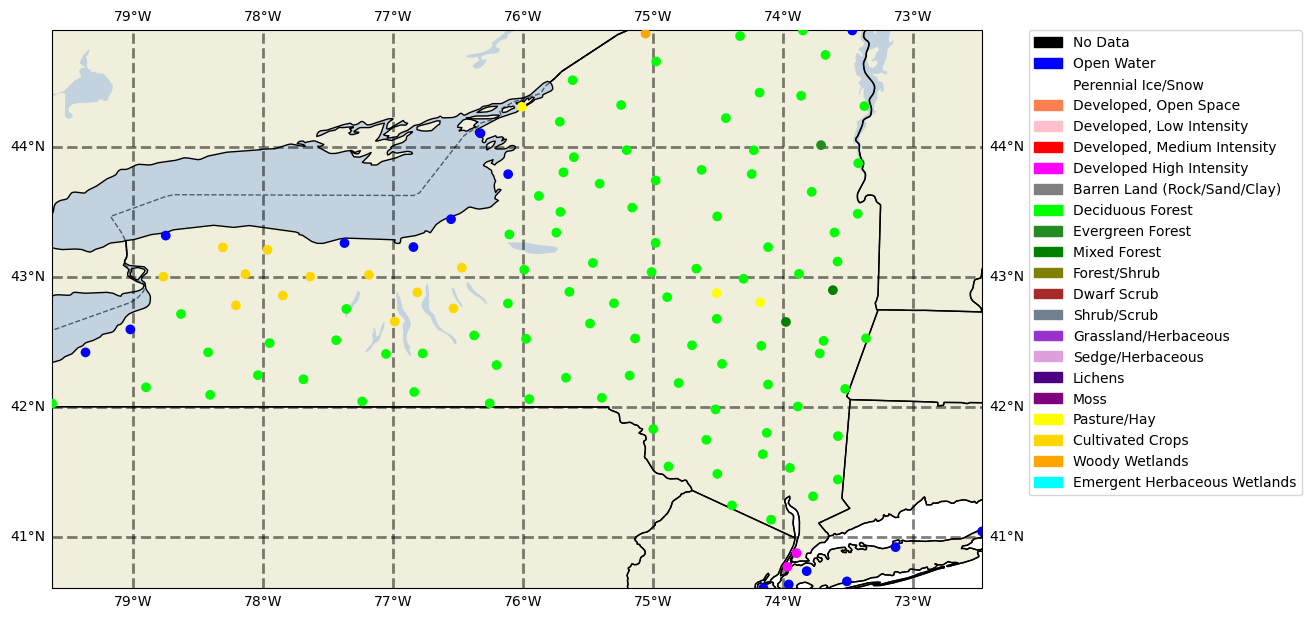

In [21]:
landtype(avg_lulc_ny_30_df)

In [22]:
colors = [
    "black",
    "blue",
    "white",
    "coral",
    "pink",
    "red",
    "magenta",
    "gray",
    "lime",
    "forestgreen",
    "green",
    "olive",
    "brown",
    "slategray",
    "darkorchid",
    "plum",
    "indigo",
    "purple",
    "yellow",
    "gold",
    "orange",
    "cyan",
]
legend = np.array(
    [
        0,
        11,
        12,
        21,
        22,
        23,
        24,
        31,
        41,
        42,
        43,
        45,
        51,
        52,
        71,
        72,
        73,
        74,
        81,
        82,
        90,
        95,
    ]
)
leg_str = [
    "No Data",
    "Open Water",
    "Perennial Ice/Snow",
    "Developed, Open Space",
    "Developed, Low Intensity",
    "Developed, Medium Intensity",
    "Developed High Intensity",
    "Barren Land (Rock/Sand/Clay)",
    "Deciduous Forest",
    "Evergreen Forest",
    "Mixed Forest",
    "Forest/Shrub",
    "Dwarf Scrub",
    "Shrub/Scrub",
    "Grassland/Herbaceous",
    "Sedge/Herbaceous",
    "Lichens",
    "Moss",
    "Pasture/Hay",
    "Cultivated Crops",
    "Woody Wetlands",
    "Emergent Herbaceous Wetlands",
]

descripdict = {}
colordict = {}

for x, _ in enumerate(colors):
    descripdict.update({legend[x]: leg_str[x]})
    colordict.update({legend[x]: colors[x]})


avg_lulc_ok_30_df["color"] = avg_lulc_ok_30_df["firstmode_val"].map(colordict)
avg_lulc_ok_30_df["lon"] = ok_df_lons
avg_lulc_ok_30_df["lat"] = ok_df_lats

NameError: name 'avg_lulc_ok_30_df' is not defined

In [ ]:
landtype(avg_lulc_ok_30_df)

In [23]:
avg_lulc_ny_30_df

,Unnamed: 0,station,firstmode_count,firstmode_class,firstmode_val,secondmode_count,secondmode_class,secondmode_val,thirdmode_count,thirdmode_class,thirdmode_val,sum_total,color,lon,lat
0,0,ADDI,1172235.0,Deciduous Forest,41,810497.0,Pasture/Hay,81,649824.0,Mixed Forest,43,3140877.0,lime,-77.237259,42.040359
1,1,ANDE,1957335.0,Deciduous Forest,41,495694.0,Mixed Forest,43,355099.0,Pasture/Hay,81,3140936.0,lime,-74.801392,42.182270
2,2,BATA,1370969.0,Cultivated Crops,82,506225.0,Deciduous Forest,41,492236.0,Woody Wetlands,90,3140860.0,gold,-78.135658,43.019939
3,3,BEAC,1500665.0,Deciduous Forest,41,319906.0,Pasture/Hay,81,311170.0,Developed Open Space,21,3140916.0,lime,-73.945267,41.528751
4,4,BELD,1134915.0,Deciduous Forest,41,824000.0,Mixed Forest,43,562246.0,Pasture/Hay,81,3140934.0,lime,-75.668518,42.223221
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121,121,WFMB,1117621.0,Deciduous Forest,41,995143.0,Evergreen Forest,42,516474.0,Mixed Forest,43,3140877.0,lime,-73.858826,44.393234
122,122,WGAT,1629718.0,Deciduous Forest,41,412308.0,Evergreen Forest,42,349867.0,Woody Wetlands,90,3140895.0,lime,-75.158600,43.532410
123,123,WHIT,1057058.0,Deciduous Forest,41,590814.0,Evergreen Forest,42,443394.0,Pasture/Hay,81,3140881.0,lime,-73.423073,43.485073
124,124,WOLC,944078.0,Open Water,11,671635.0,Cultivated Crops,82,580341.0,Deciduous Forest,41,3140871.0,blue,-76.842613,43.228680


In [24]:
avg_lulc_ny_30_df["firstmode_class"].value_counts()

Deciduous Forest            90
Open Water                  15
Cultivated Crops            12
Pasture/Hay                  3
Developed High Intensity     2
Mixed Forest                 2
Woody Wetlands               1
Evergreen Forest             1
Name: firstmode_class, dtype: int64

In [25]:
avg_lulc_ok_30_df["firstmode_class"].value_counts()

NameError: name 'avg_lulc_ok_30_df' is not defined

In [26]:
format_df(avg_lulc_ny_30_df)
# format_df(avg_lulc_ok_30_df)

-76.04497146606445 42.74983215332031


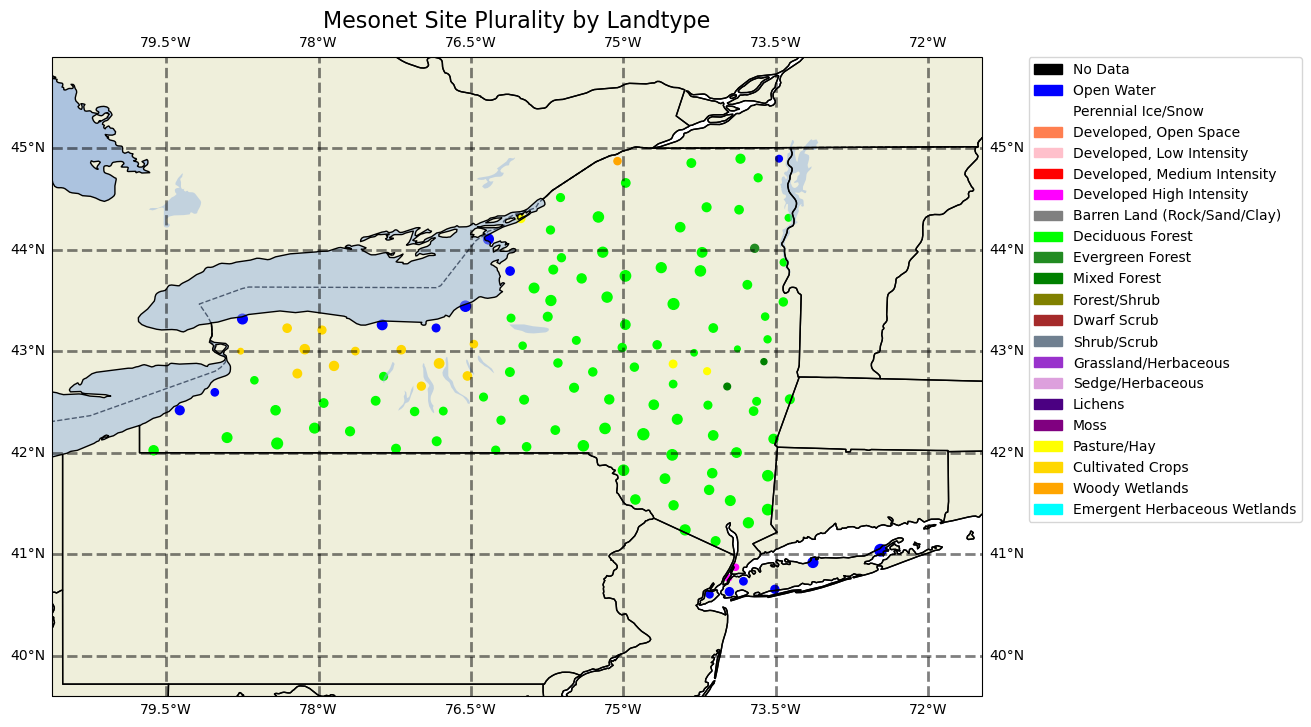

In [27]:
plurality_plot(avg_lulc_ny_30_df)

In [28]:
plurality_plot(avg_lulc_ok_30_df)

NameError: name 'avg_lulc_ok_30_df' is not defined

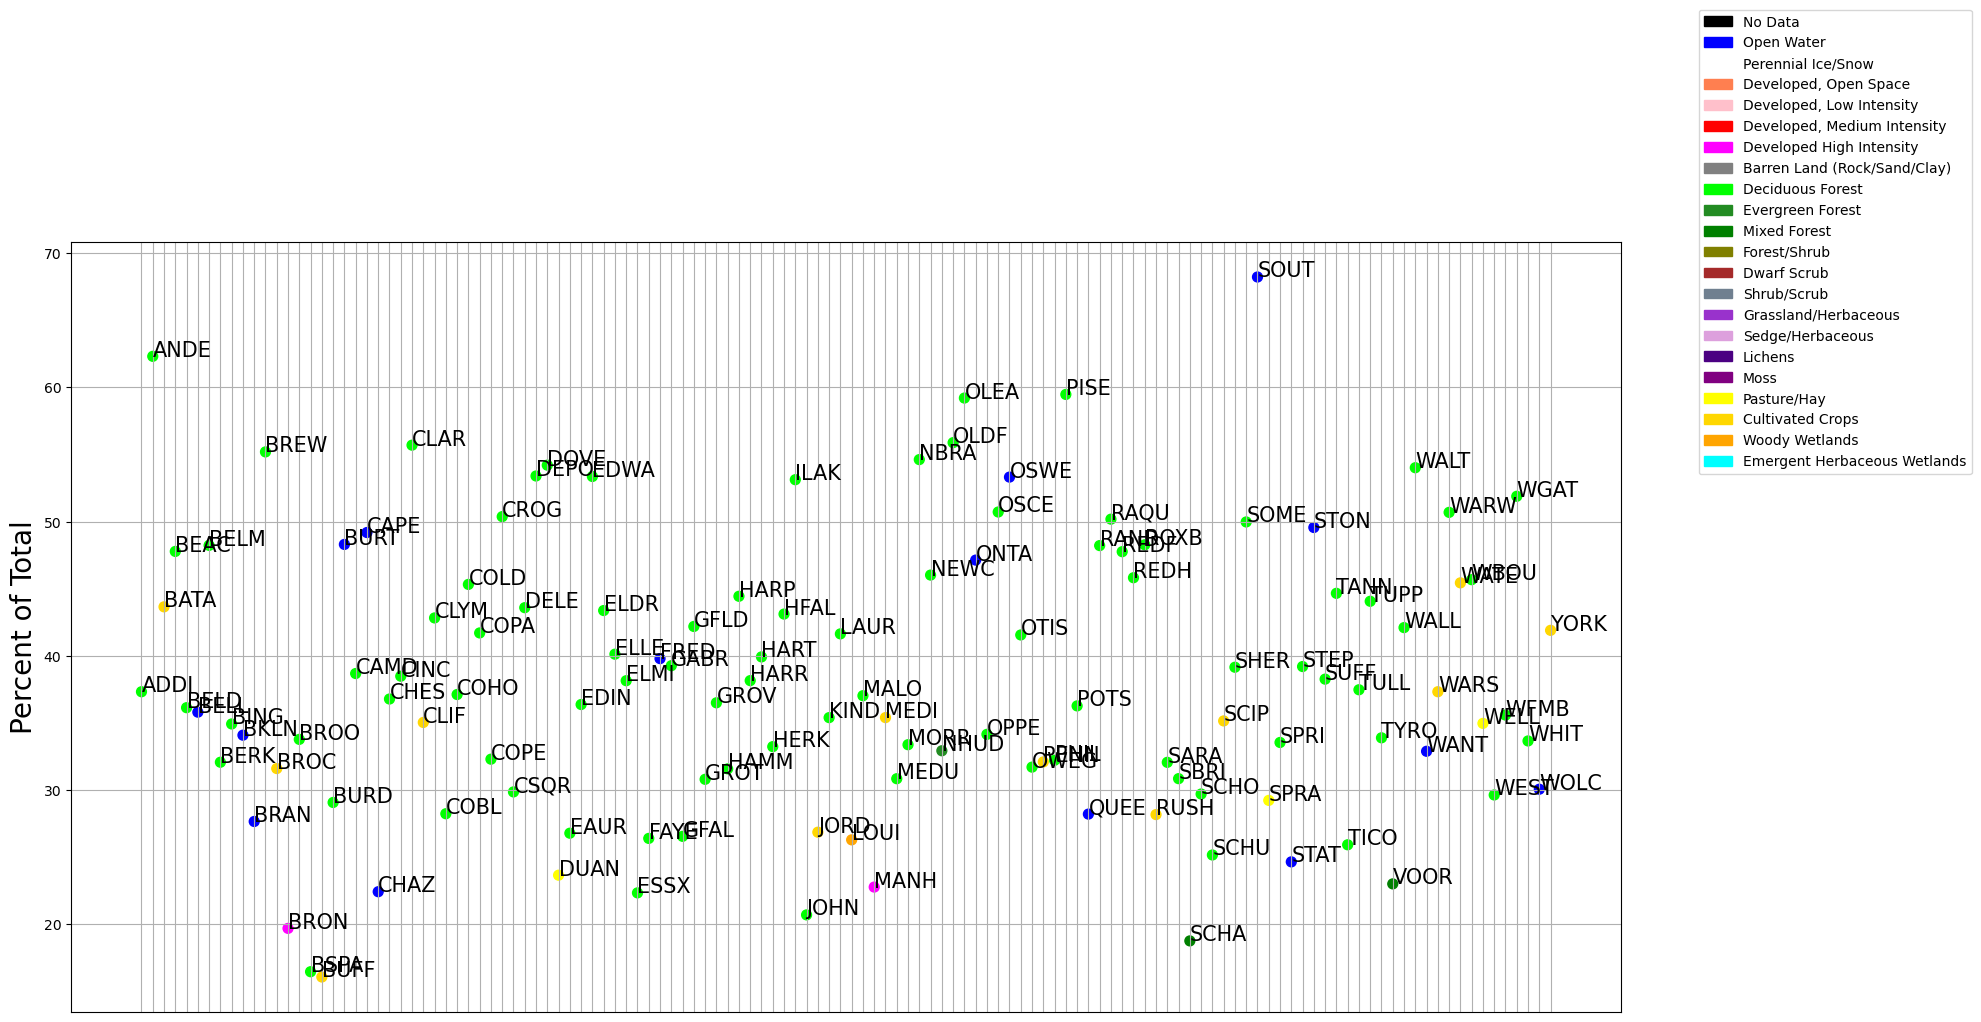

In [29]:
percent_plot(avg_lulc_ny_30_df)

In [30]:
percent_plot(avg_lulc_ok_30_df)

NameError: name 'avg_lulc_ok_30_df' is not defined

In [ ]:
# get plurality
statlist = []
lon_list = []
lat_list = []
c_list = []
div_list = []

for x, _ in avg_lulc_ny_30_df.iterrows():
    if avg_lulc_ny_30_df["divide"].iloc[x] > 50:
        station = avg_lulc_ny_30_df["station"].iloc[x]
        lons = avg_lulc_ny_30_df["lon"].iloc[x]
        lats = avg_lulc_ny_30_df["lat"].iloc[x]
        color = avg_lulc_ny_30_df["color"].iloc[x]
        divide = avg_lulc_ny_30_df["divide"].iloc[x]
        statlist.append(station)
        lon_list.append(lons)
        lat_list.append(lats)
        c_list.append(color)
        div_list.append(divide)

In [31]:
plur_df = pd.DataFrame()
plur_df["station"] = statlist
plur_df["lon"] = lon_list
plur_df["lat"] = lat_list
plur_df["color"] = c_list
plur_df["divide"] = div_list

NameError: name 'statlist' is not defined

In [32]:
plurality_plot(plur_df)

KeyError: 'lat'

In [33]:
# get plurality
statlist_ok = []
lon_list_ok = []
lat_list_ok = []
c_list_ok = []
div_list_ok = []

for x, _ in avg_lulc_ok_30_df.iterrows():
    if avg_lulc_ok_30_df["divide"].iloc[x] > 50:
        station = avg_lulc_ok_30_df["station"].iloc[x]
        lons = avg_lulc_ok_30_df["lon"].iloc[x]
        lats = avg_lulc_ok_30_df["lat"].iloc[x]
        color = avg_lulc_ok_30_df["color"].iloc[x]
        divide = avg_lulc_ok_30_df["divide"].iloc[x]
        statlist_ok.append(station)
        lon_list_ok.append(lons)
        lat_list_ok.append(lats)
        c_list_ok.append(color)
        div_list_ok.append(divide)

NameError: name 'avg_lulc_ok_30_df' is not defined

In [34]:
plur_df_ok = pd.DataFrame()
plur_df_ok["station"] = statlist_ok
plur_df_ok["lon"] = lon_list_ok
plur_df_ok["lat"] = lat_list_ok
plur_df_ok["color"] = c_list_ok
plur_df_ok["divide"] = div_list_ok

In [35]:
plurality_plot(plur_df_ok)

CRSError: Invalid projection: +proj=lcc +ellps=WGS84 +lon_0=nan +lat_0=nan +x_0=0.0 +y_0=0.0 +lat_1=33 +lat_2=45 +no_defs +type=crs: (Internal Proj Error: proj_create: invalid value for lat_0)

In [36]:
plur_df

""


In [37]:
avg_lulc_ny_30_df

,Unnamed: 0,station,firstmode_count,firstmode_class,firstmode_val,secondmode_count,secondmode_class,secondmode_val,thirdmode_count,thirdmode_class,thirdmode_val,sum_total,color,lon,lat,divide
0,0,ADDI,1172235.0,Deciduous Forest,41,810497.0,Pasture/Hay,81,649824.0,Mixed Forest,43,3140877.0,lime,-77.237259,42.040359,37.321901
1,1,ANDE,1957335.0,Deciduous Forest,41,495694.0,Mixed Forest,43,355099.0,Pasture/Hay,81,3140936.0,lime,-74.801392,42.182270,62.316934
2,2,BATA,1370969.0,Cultivated Crops,82,506225.0,Deciduous Forest,41,492236.0,Woody Wetlands,90,3140860.0,gold,-78.135658,43.019939,43.649478
3,3,BEAC,1500665.0,Deciduous Forest,41,319906.0,Pasture/Hay,81,311170.0,Developed Open Space,21,3140916.0,lime,-73.945267,41.528751,47.777941
4,4,BELD,1134915.0,Deciduous Forest,41,824000.0,Mixed Forest,43,562246.0,Pasture/Hay,81,3140934.0,lime,-75.668518,42.223221,36.133042
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121,121,WFMB,1117621.0,Deciduous Forest,41,995143.0,Evergreen Forest,42,516474.0,Mixed Forest,43,3140877.0,lime,-73.858826,44.393234,35.583087
122,122,WGAT,1629718.0,Deciduous Forest,41,412308.0,Evergreen Forest,42,349867.0,Woody Wetlands,90,3140895.0,lime,-75.158600,43.532410,51.887058
123,123,WHIT,1057058.0,Deciduous Forest,41,590814.0,Evergreen Forest,42,443394.0,Pasture/Hay,81,3140881.0,lime,-73.423073,43.485073,33.654825
124,124,WOLC,944078.0,Open Water,11,671635.0,Cultivated Crops,82,580341.0,Deciduous Forest,41,3140871.0,blue,-76.842613,43.228680,30.057841


In [38]:
# get plurality
statlist_ok = []
div_list1_ok = []
div_list2_ok = []
div_list3_ok = []
div_list4_ok = []
class1_list = []
class2_list = []
class3_list = []

for x, _ in avg_lulc_ok_30_df.iterrows():
    station = avg_lulc_ok_30_df["station"].iloc[x]
    divide1 = (
        avg_lulc_ok_30_df["firstmode_count"].iloc[x]
        / avg_lulc_ok_30_df["sum_total"].iloc[x]
    ) * 100
    class1 = avg_lulc_ok_30_df["firstmode_val"].iloc[x]
    divide2 = (
        avg_lulc_ok_30_df["secondmode_count"].iloc[x]
        / avg_lulc_ok_30_df["sum_total"].iloc[x]
    ) * 100
    class2 = avg_lulc_ok_30_df["secondmode_val"].iloc[x]
    divide3 = (
        avg_lulc_ok_30_df["thirdmode_count"].iloc[x]
        / avg_lulc_ok_30_df["sum_total"].iloc[x]
    ) * 100
    class3 = avg_lulc_ok_30_df["thirdmode_val"].iloc[x]
    divide4 = 100 - (divide1 + divide2 + divide3)
    statlist_ok.append(station)
    c_list_ok.append(color)
    div_list1_ok.append(divide1)
    div_list2_ok.append(divide2)
    div_list3_ok.append(divide3)
    div_list4_ok.append(divide4)
    class1_list.append(class1)
    class2_list.append(class2)
    class3_list.append(class3)

stackbar_df_ok = pd.DataFrame()
stackbar_df_ok["station"] = statlist_ok
stackbar_df_ok["div1"] = div_list1_ok
stackbar_df_ok["div2"] = div_list2_ok
stackbar_df_ok["div3"] = div_list3_ok
stackbar_df_ok["div4"] = div_list4_ok
stackbar_df_ok["class1"] = class1_list
stackbar_df_ok["class2"] = class2_list
stackbar_df_ok["class3"] = class3_list

NameError: name 'avg_lulc_ok_30_df' is not defined

In [39]:
stackbar_df_ok

NameError: name 'stackbar_df_ok' is not defined

In [40]:
# get colors
colors = [
    "black",
    "blue",
    "white",
    "coral",
    "pink",
    "red",
    "magenta",
    "gray",
    "lime",
    "forestgreen",
    "green",
    "olive",
    "brown",
    "slategray",
    "darkorchid",
    "plum",
    "indigo",
    "purple",
    "yellow",
    "gold",
    "orange",
    "cyan",
]
legend = np.array(
    [
        0,
        11,
        12,
        21,
        22,
        23,
        24,
        31,
        41,
        42,
        43,
        45,
        51,
        52,
        71,
        72,
        73,
        74,
        81,
        82,
        90,
        95,
    ]
)
leg_str = [
    "No Data",
    "Open Water",
    "Perennial Ice/Snow",
    "Developed, Open Space",
    "Developed, Low Intensity",
    "Developed, Medium Intensity",
    "Developed High Intensity",
    "Barren Land (Rock/Sand/Clay)",
    "Deciduous Forest",
    "Evergreen Forest",
    "Mixed Forest",
    "Forest/Shrub",
    "Dwarf Scrub",
    "Shrub/Scrub",
    "Grassland/Herbaceous",
    "Sedge/Herbaceous",
    "Lichens",
    "Moss",
    "Pasture/Hay",
    "Cultivated Crops",
    "Woody Wetlands",
    "Emergent Herbaceous Wetlands",
]

descripdict = {}
colordict = {}

for x, _ in enumerate(colors):
    descripdict.update({legend[x]: leg_str[x]})
    colordict.update({legend[x]: colors[x]})

descripdict = {}
colordict = {}

for x, _ in enumerate(colors):
    descripdict.update({legend[x]: leg_str[x]})
    colordict.update({legend[x]: colors[x]})


stackbar_df_ok["color1"] = stackbar_df_ok["class1"].map(colordict)
stackbar_df_ok["color2"] = stackbar_df_ok["class2"].map(colordict)
stackbar_df_ok["color3"] = stackbar_df_ok["class3"].map(colordict)
stackbar_df_ok["color4"] = "black"

NameError: name 'stackbar_df_ok' is not defined

In [45]:
# get plurality
statlist = []
div_list1 = []
div_list2 = []
div_list3 = []
div_list4 = []
class1_list_ny = []
class2_list_ny = []
class3_list_ny = []

for x, _ in avg_lulc_ny_30_df.iterrows():
    station = avg_lulc_ny_30_df["station"].iloc[x]
    divide1 = (
        avg_lulc_ny_30_df["firstmode_count"].iloc[x]
        / avg_lulc_ny_30_df["sum_total"].iloc[x]
    ) * 100
    class1 = avg_lulc_ny_30_df["firstmode_val"].iloc[x]
    divide2 = (
        avg_lulc_ny_30_df["secondmode_count"].iloc[x]
        / avg_lulc_ny_30_df["sum_total"].iloc[x]
    ) * 100
    class2 = avg_lulc_ny_30_df["secondmode_val"].iloc[x]
    divide3 = (
        avg_lulc_ny_30_df["thirdmode_count"].iloc[x]
        / avg_lulc_ny_30_df["sum_total"].iloc[x]
    ) * 100
    class3 = avg_lulc_ny_30_df["thirdmode_val"].iloc[x]
    divide4 = 100 - (divide1 + divide2 + divide3)
    statlist.append(station)

    div_list1.append(divide1)
    div_list2.append(divide2)
    div_list3.append(divide3)
    div_list4.append(divide4)
    class1_list_ny.append(class1)
    class2_list_ny.append(class2)
    class3_list_ny.append(class3)

stackbar_df = pd.DataFrame()
stackbar_df["station"] = statlist
stackbar_df["div1"] = div_list1
stackbar_df["div2"] = div_list2
stackbar_df["div3"] = div_list3
stackbar_df["div4"] = div_list4
stackbar_df["class1"] = class1_list_ny
stackbar_df["class2"] = class2_list_ny
stackbar_df["class3"] = class3_list_ny

In [46]:
# get colors
colors = [
    "black",
    "blue",
    "white",
    "coral",
    "pink",
    "red",
    "magenta",
    "gray",
    "lime",
    "forestgreen",
    "green",
    "olive",
    "brown",
    "slategray",
    "darkorchid",
    "plum",
    "indigo",
    "purple",
    "yellow",
    "gold",
    "orange",
    "cyan",
]
legend = np.array(
    [
        0,
        11,
        12,
        21,
        22,
        23,
        24,
        31,
        41,
        42,
        43,
        45,
        51,
        52,
        71,
        72,
        73,
        74,
        81,
        82,
        90,
        95,
    ]
)
leg_str = [
    "No Data",
    "Open Water",
    "Perennial Ice/Snow",
    "Developed, Open Space",
    "Developed, Low Intensity",
    "Developed, Medium Intensity",
    "Developed High Intensity",
    "Barren Land (Rock/Sand/Clay)",
    "Deciduous Forest",
    "Evergreen Forest",
    "Mixed Forest",
    "Forest/Shrub",
    "Dwarf Scrub",
    "Shrub/Scrub",
    "Grassland/Herbaceous",
    "Sedge/Herbaceous",
    "Lichens",
    "Moss",
    "Pasture/Hay",
    "Cultivated Crops",
    "Woody Wetlands",
    "Emergent Herbaceous Wetlands",
]

descripdict = {}
colordict = {}

for x, _ in enumerate(colors):
    descripdict.update({legend[x]: leg_str[x]})
    colordict.update({legend[x]: colors[x]})

descripdict = {}
colordict = {}

for x, _ in enumerate(colors):
    descripdict.update({legend[x]: leg_str[x]})
    colordict.update({legend[x]: colors[x]})


stackbar_df["color1"] = stackbar_df["class1"].map(colordict)
stackbar_df["color2"] = stackbar_df["class2"].map(colordict)
stackbar_df["color3"] = stackbar_df["class3"].map(colordict)
stackbar_df["color4"] = "black"

In [47]:
sorted_df = stackbar_df.sort_values(by=["color1"], ascending=True)
stations = ['BUFF', 'VOOR', 'BRON']
sorted_df =sorted_df[sorted_df['station'].isin(stations)]

In [48]:
sorted_df_rev = sorted_df.sort_values(by=["div1"], ascending=True)
sorted_df_rev.iloc[:10]

,station,div1,div2,div3,div4,class1,class2,class3,color1,color2,color3,color4
16,BUFF,16.064210,14.058665,13.623432,56.253694,82,90,81,gold,orange,yellow,black
13,BRON,19.688691,19.209024,17.404559,43.697726,24,23,11,magenta,red,blue,black
111,VOOR,23.003078,17.890154,14.994791,44.111976,43,41,81,green,lime,yellow,black


In [50]:
sorted_df

,station,div1,div2,div3,div4,class1,class2,class3,color1,color2,color3,color4
16,BUFF,16.064210,14.058665,13.623432,56.253694,82,90,81,gold,orange,yellow,black
111,VOOR,23.003078,17.890154,14.994791,44.111976,43,41,81,green,lime,yellow,black
13,BRON,19.688691,19.209024,17.404559,43.697726,24,23,11,magenta,red,blue,black


0
1
2
3


IndexError: single positional indexer is out-of-bounds

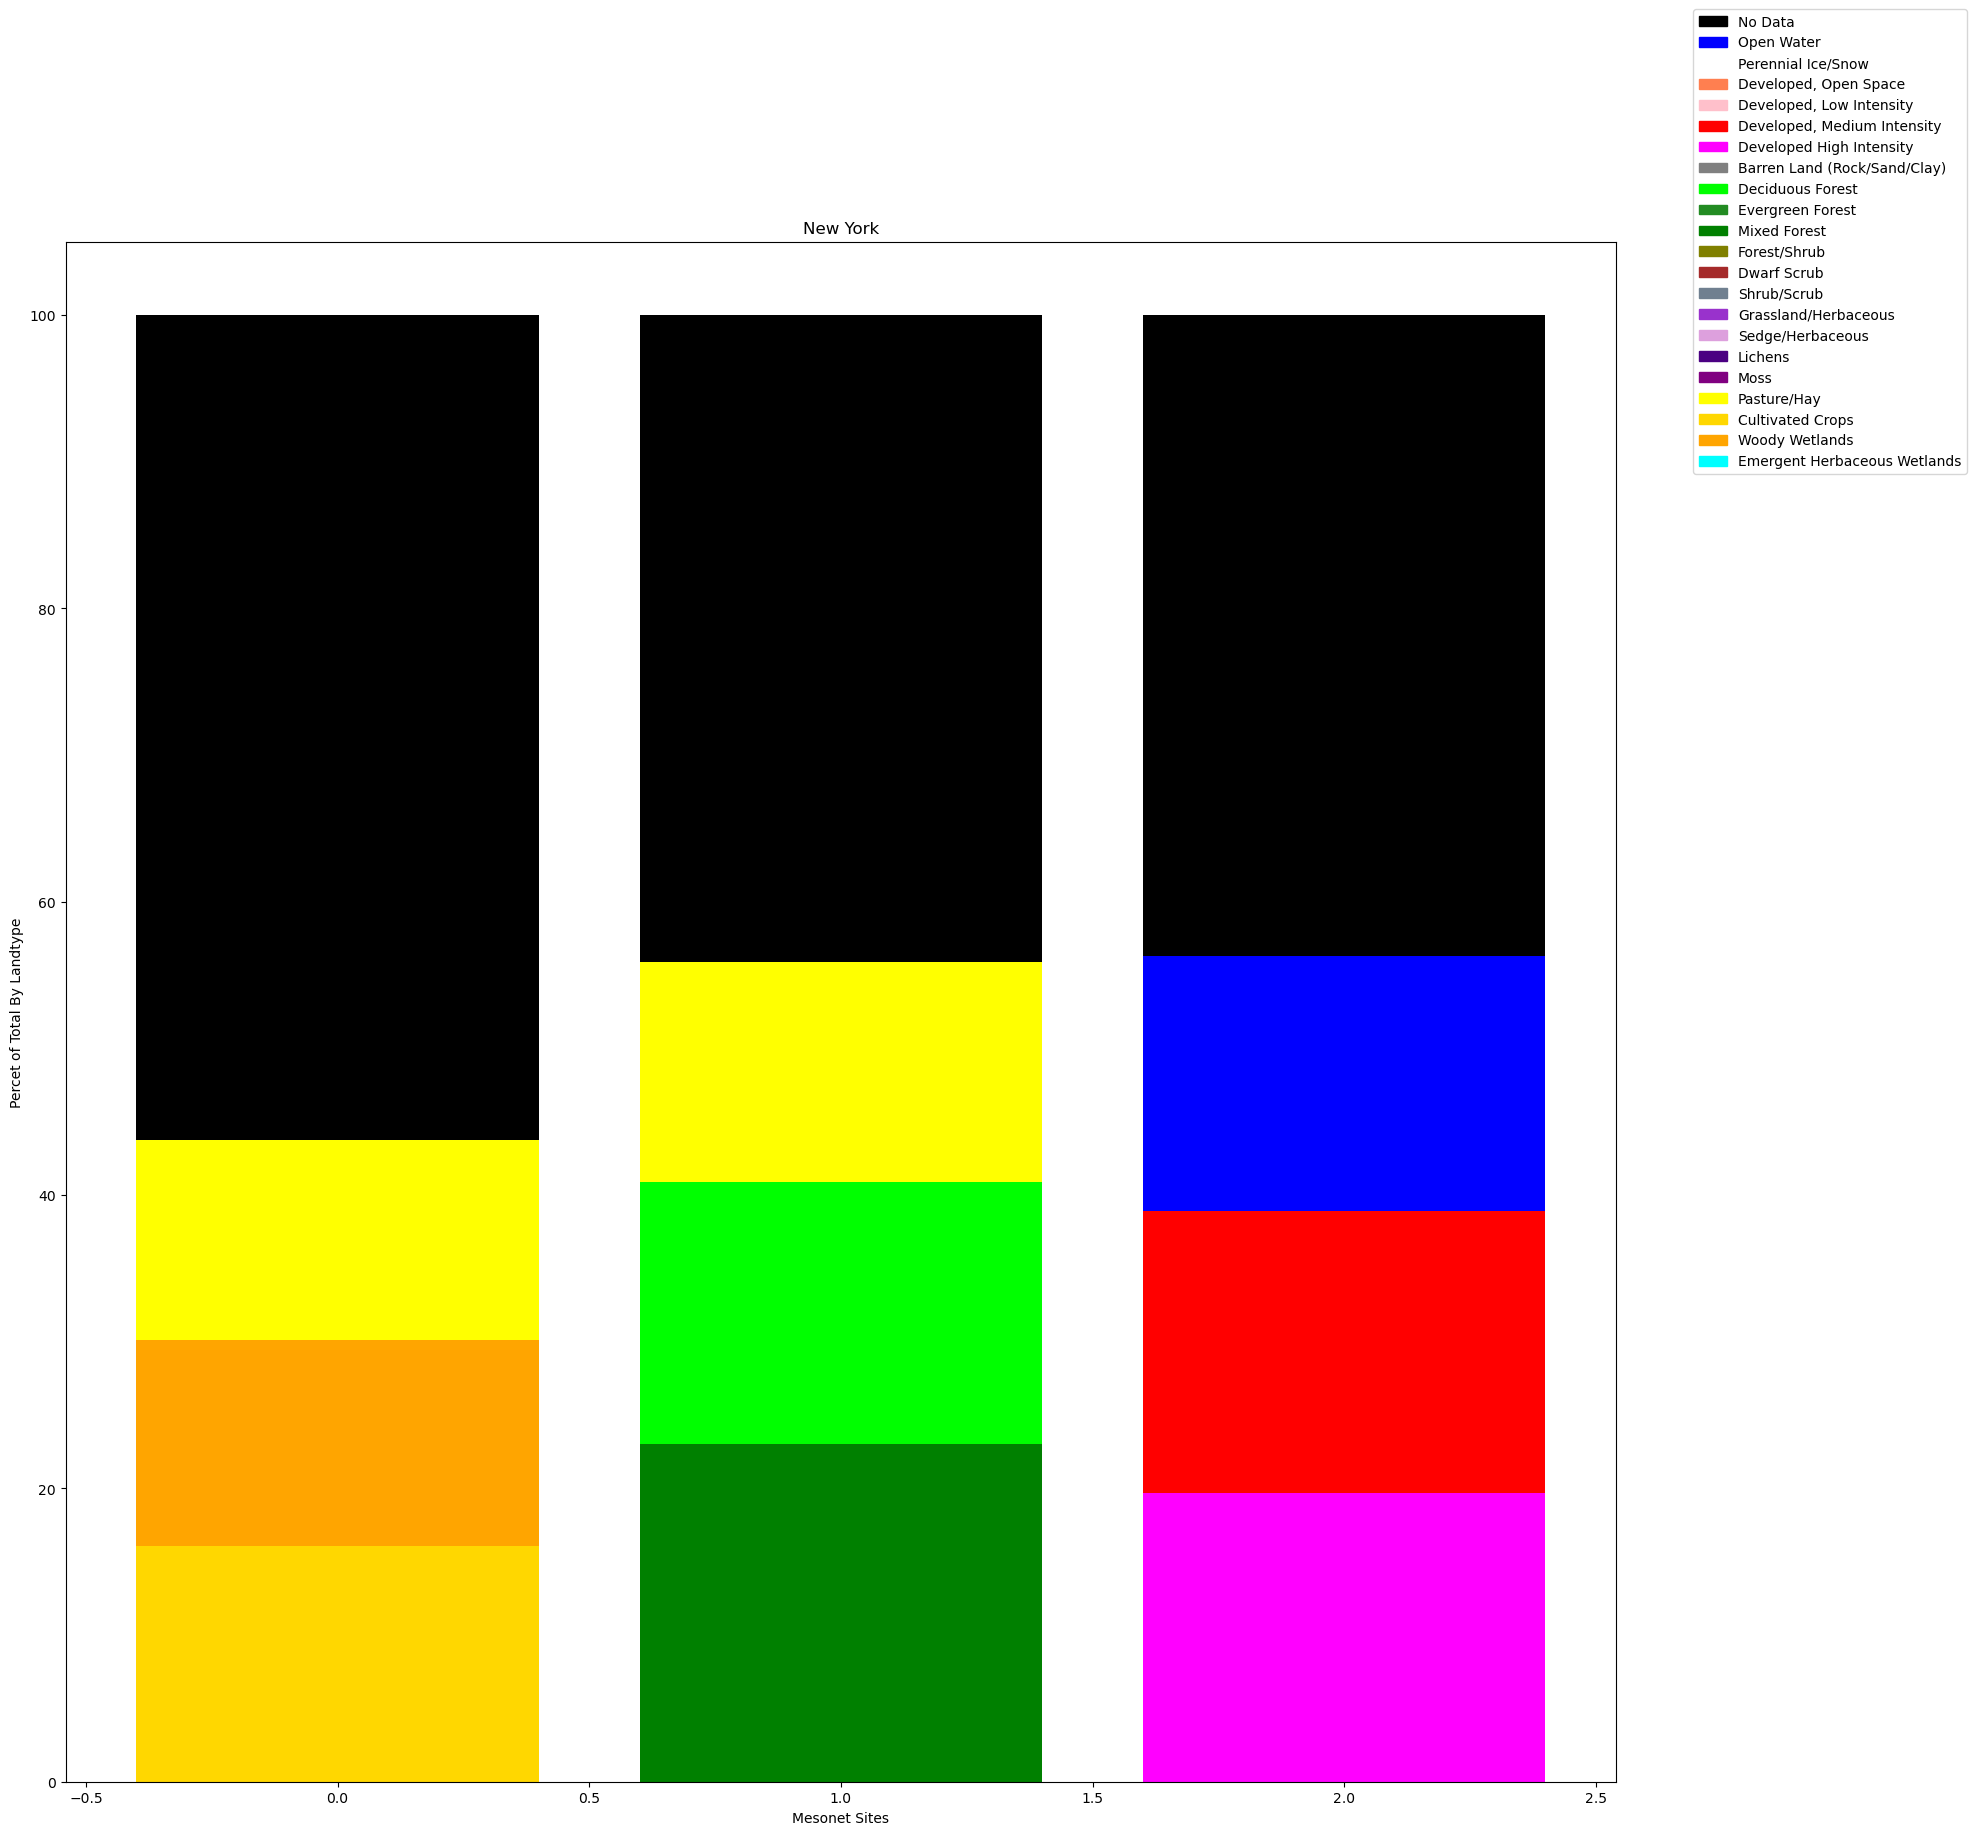

In [55]:
colors = [
    "black",
    "blue",
    "white",
    "coral",
    "pink",
    "red",
    "magenta",
    "gray",
    "lime",
    "forestgreen",
    "green",
    "olive",
    "brown",
    "slategray",
    "darkorchid",
    "plum",
    "indigo",
    "purple",
    "yellow",
    "gold",
    "orange",
    "cyan",
]
legend = np.array(
    [
        0,
        11,
        12,
        21,
        22,
        23,
        24,
        31,
        41,
        42,
        43,
        45,
        51,
        52,
        71,
        72,
        73,
        74,
        81,
        82,
        90,
        95,
    ]
)
leg_str = [
    "No Data",
    "Open Water",
    "Perennial Ice/Snow",
    "Developed, Open Space",
    "Developed, Low Intensity",
    "Developed, Medium Intensity",
    "Developed High Intensity",
    "Barren Land (Rock/Sand/Clay)",
    "Deciduous Forest",
    "Evergreen Forest",
    "Mixed Forest",
    "Forest/Shrub",
    "Dwarf Scrub",
    "Shrub/Scrub",
    "Grassland/Herbaceous",
    "Sedge/Herbaceous",
    "Lichens",
    "Moss",
    "Pasture/Hay",
    "Cultivated Crops",
    "Woody Wetlands",
    "Emergent Herbaceous Wetlands",
]

# legend
patches = []
for i, _ in enumerate(colors):
    patch = mpatches.Patch(color=colors[i], label=leg_str[i])
    patches.append(patch)
fig, ax = plt.subplots(figsize=(20, 20))
ax.set_xlabel("Mesonet Sites")
ax.set_ylabel("Percet of Total By Landtype")
ax.set_title("New York")

for x,_ in enumerate(sorted_df):
    print(x)
    df = sorted_df.iloc[x]
    h1 = df[1]
    h2 = h1 + df[2]
    h3 = h2 + df[3]
    h4 = h3 + df[4]
    ax.bar(x=x, height=h4, color=df[11])
    ax.bar(x=x, height=h3, color=df[10])
    ax.bar(x=x, height=h2, color=df[9])
    ax.bar(x=x, height=h1, color=df[8])
    ax.legend(
        bbox_to_anchor=(1.05, 1), loc="center left", borderaxespad=0, handles=patches
    )

In [ ]:
sorted_df_ok = stackbar_df_ok.sort_values(by=["color1"], ascending=True)

In [ ]:
colors = [
    "black",
    "blue",
    "white",
    "coral",
    "pink",
    "red",
    "magenta",
    "gray",
    "lime",
    "forestgreen",
    "green",
    "olive",
    "brown",
    "slategray",
    "darkorchid",
    "plum",
    "indigo",
    "purple",
    "yellow",
    "gold",
    "orange",
    "cyan",
]
legend = np.array(
    [
        0,
        11,
        12,
        21,
        22,
        23,
        24,
        31,
        41,
        42,
        43,
        45,
        51,
        52,
        71,
        72,
        73,
        74,
        81,
        82,
        90,
        95,
    ]
)
leg_str = [
    "No Data",
    "Open Water",
    "Perennial Ice/Snow",
    "Developed, Open Space",
    "Developed, Low Intensity",
    "Developed, Medium Intensity",
    "Developed High Intensity",
    "Barren Land (Rock/Sand/Clay)",
    "Deciduous Forest",
    "Evergreen Forest",
    "Mixed Forest",
    "Forest/Shrub",
    "Dwarf Scrub",
    "Shrub/Scrub",
    "Grassland/Herbaceous",
    "Sedge/Herbaceous",
    "Lichens",
    "Moss",
    "Pasture/Hay",
    "Cultivated Crops",
    "Woody Wetlands",
    "Emergent Herbaceous Wetlands",
]

# legend
patches = []
for i, _ in enumerate(colors):
    patch = mpatches.Patch(color=colors[i], label=leg_str[i])
    patches.append(patch)
fig, ax = plt.subplots(figsize=(20, 20))
ax.set_xlabel("Mesonet Sites")
ax.set_ylabel("Percet of Total By Landtype")
ax.set_title("Oklahoma")

for x, _ in sorted_df_ok.iterrows():
    df = sorted_df_ok.iloc[x]
    h1 = df[1]
    h2 = h1 + df[2]
    h3 = h2 + df[3]
    h4 = h3 + df[4]
    ax.bar(x=x, height=h4, color=df[11])
    ax.bar(x=x, height=h3, color=df[10])
    ax.bar(x=x, height=h2, color=df[9])
    ax.bar(x=x, height=h1, color=df[8])
    ax.legend(
        bbox_to_anchor=(1.05, 1), loc="center left", borderaxespad=0, handles=patches
    )